### LENET 5 Architecture

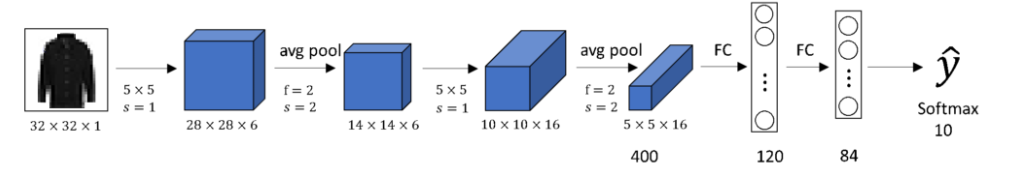

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [43]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize

Importing data

In [44]:
data= pd.read_csv('/content/train.csv')

In [45]:
data.shape

(42000, 785)

In [46]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
labels= data['label'].values
images= data.drop('label',axis=1).values

In [48]:
images= images.reshape(-1,28,28,1)
images= images/ 255.0

In [52]:
# # Convert labels to categorical
labels = to_categorical(labels, num_classes=10)

In [53]:
print(images.shape)
print(labels.shape)

(42000, 28, 28, 1)
(42000, 10)


In [54]:
# splitting train and test data

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Lenet Architecture

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

In [85]:
model= Sequential()

#part1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#part2
model.add(Conv2D(16, kernel_size=(5,5), padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#part3
model.add(Flatten())

#part4
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

#part5
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# Results
history= model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7604 - loss: 0.8261 - val_accuracy: 0.9193 - val_loss: 0.2751
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9319 - loss: 0.2218 - val_accuracy: 0.9490 - val_loss: 0.1743
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9566 - loss: 0.1414 - val_accuracy: 0.9613 - val_loss: 0.1282
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0929 - val_accuracy: 0.9652 - val_loss: 0.1172
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0795 - val_accuracy: 0.9739 - val_loss: 0.0887
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9744 - val_loss: 0.0827
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9755 - val_loss: 0.0784
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0440 - val_accuracy: 0.

making predictions on test data

In [59]:
test_data= pd.read_csv('/content/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test_data= test_data.values

In [66]:
test_data= test_data.reshape(-1,28,28,1)
test_data= test_data/ 255.0

In [67]:
test_data.shape

(28000, 28, 28, 1)

In [71]:
predictions= model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Making submission files

In [77]:
sample_submissions= pd.read_csv('/content/sample_submission.csv')
sample_submissions.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [78]:
submission_dict={'ImageId':sample_submissions['ImageId'],'Label':predicted_labels}
submission_dataframe= pd.DataFrame(submission_dict)

In [79]:
submission_dataframe

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [81]:
submission_dataframe.to_csv("submission.csv", index=False)